### 패혈증(Sepsis) 생존/사망 여부 예측 모델
- ~~~~.csv
- 피쳐: 3개 (환자 나이, 환자 성별, 환자의 패혈증 발병 횟수)
- 타겟: 9일 후 사망/생존 여부
- 학습: 지도학습 >> 분류 >> 2진 분류
- 알고리즘: DNN ()
- 프레임워크: pytorch


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# DATA_PATH = r'C:\Users\KDP-43\Desktop\@DL_project\data\s41598-020-73558-3_sepsis_survival_primary_cohort.csv'
DATA_PATH = r'./data/s41598-020-73558-3_sepsis_survival_primary_cohort.csv'

rawDF = pd.read_csv(DATA_PATH)
rawDF.head(3)

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1


In [4]:
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110204 entries, 0 to 110203
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   age_years                      110204 non-null  int64
 1   sex_0male_1female              110204 non-null  int64
 2   episode_number                 110204 non-null  int64
 3   hospital_outcome_1alive_0dead  110204 non-null  int64
dtypes: int64(4)
memory usage: 3.4 MB


##### 생존/사망 비율 

In [5]:
rawDF[rawDF.columns[-1]].value_counts()

hospital_outcome_1alive_0dead
1    102099
0      8105
Name: count, dtype: int64

In [6]:
rawDF[rawDF.columns[-1]].value_counts() *(100/len(rawDF))

hospital_outcome_1alive_0dead
1    92.645458
0     7.354542
Name: count, dtype: float64

<hr>
- 사망: 8105명 (7%) / 생존: 102099명 (92%)
	* => 엄청난 불균형 데이터
	<hr>

##### 패혈증 발병 횟수 distribution

In [7]:
rawDF['episode_number'].value_counts()

episode_number
1    84811
2    16688
3     5403
4     2199
5     1103
Name: count, dtype: int64

(array([84811., 16688.,  5403.,  2199.,  1103.,     0.]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

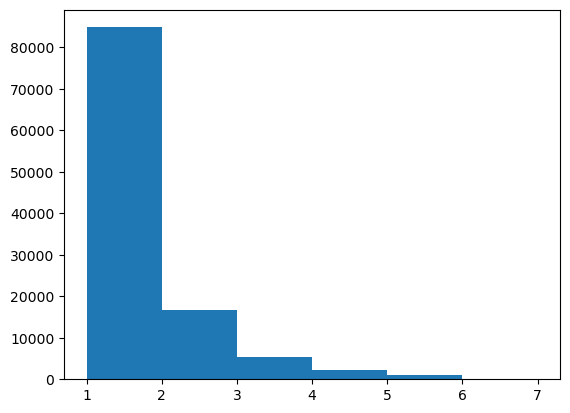

In [8]:
x_range = range(1,8)
plt.hist(rawDF[rawDF.columns[2]], bins=x_range)
# plt.show()

#### 환자 나이 distribution

In [9]:
rawDF[rawDF.columns[0]].value_counts()

age_years
82     2665
84     2621
81     2541
83     2523
80     2520
       ... 
10      159
14      153
13      151
100     128
99       84
Name: count, Length: 101, dtype: int64

(array([ 6103.,  2574.,  4518.,  5636.,  7603., 11209., 19511., 21110.,
        24293.,  7647.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

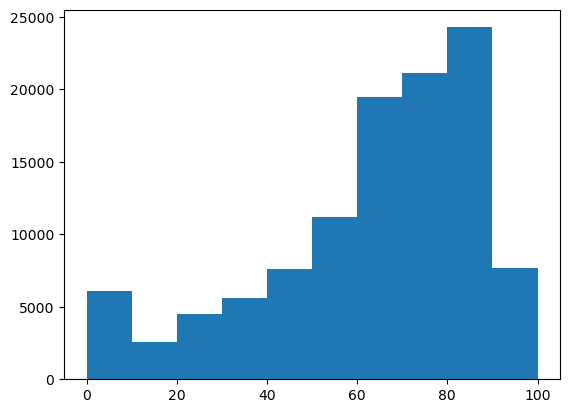

In [10]:
plt.hist(rawDF[rawDF.columns[0]])

##### 사망자 나이 분포

Text(0.5, 1.0, 'ALIVE PEOPLE AGE')

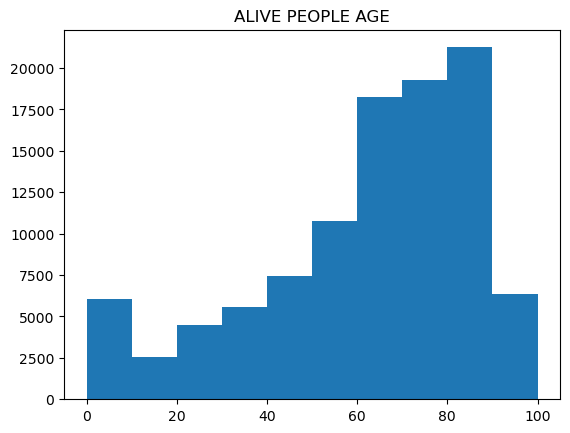

In [11]:
deadDF = rawDF.groupby('hospital_outcome_1alive_0dead').get_group(0)
aliveDF = rawDF.groupby('hospital_outcome_1alive_0dead').get_group(1)

plt.hist(aliveDF[aliveDF.columns[0]])
plt.title("ALIVE PEOPLE AGE")

##### 사망자 나이 분포

Text(0.5, 1.0, 'Dead People AGE')

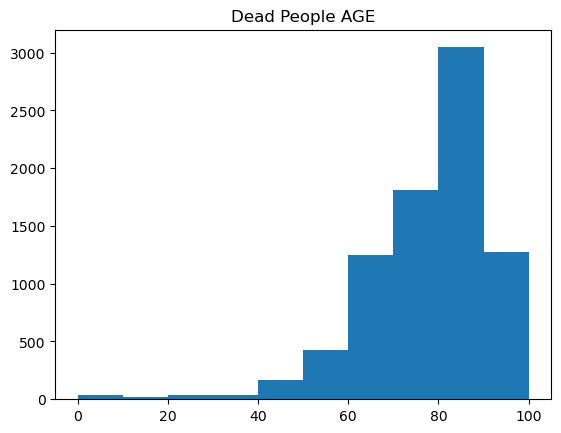

In [12]:
plt.hist(deadDF[deadDF.columns[0]])
plt.title("Dead People AGE")

- 생존자 그룹 & 사망자 그룹 나이 분포 왼쪽으로 꼬리가 긴 분포
- 			=> 정규화 필요한가?? 	=> 질문!!

#### 패혈증 발병 횟수 

##### 사망자 그룹 패혈증 발병 횟수 분포

Text(0.5, 1.0, 'DEAD PEOPLE Sepsis history')

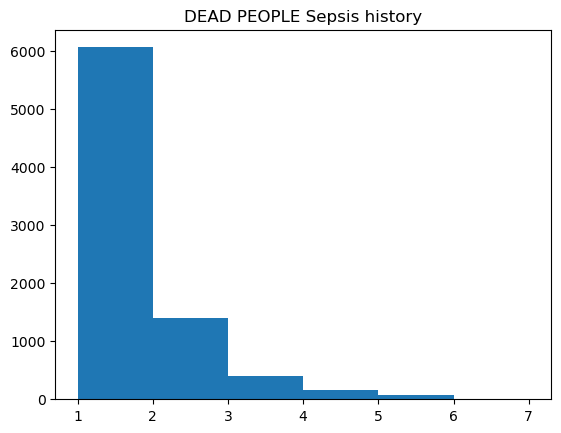

In [13]:
x_range = range(1,8)
plt.hist(deadDF[deadDF.columns[2]], bins=x_range)
plt.title("DEAD PEOPLE Sepsis history")

##### 생존자 그룹 패혈증 발병 횟수 분포

Text(0.5, 1.0, 'Alive PEOPLE Sepsis history')

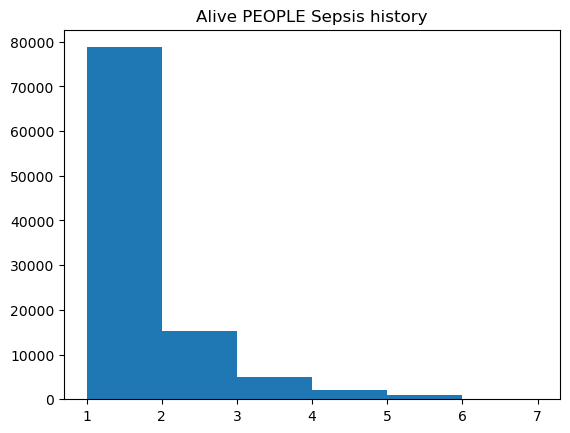

In [14]:
x_range = range(1,8)
plt.hist(aliveDF[aliveDF.columns[2]], bins=x_range)
plt.title("Alive PEOPLE Sepsis history")

#### 성별 분포
- 0: male, 1: female

In [16]:
rawDF[rawDF.columns[1]].value_counts()

sex_0male_1female
0    57973
1    52231
Name: count, dtype: int64

##### 생존자 그룹 성별 비율

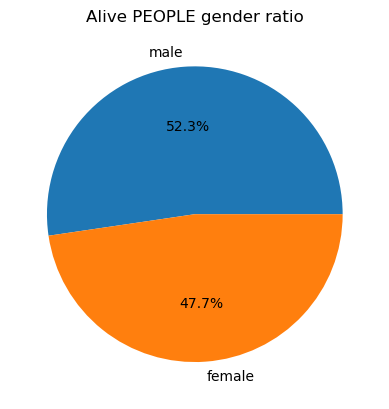

In [17]:
plt.pie(aliveDF[aliveDF.columns[1]].value_counts(), labels=['male','female'], autopct='%.1f%%')
plt.title("Alive PEOPLE gender ratio")
plt.show()

##### 사망자 그룹 성별 비율

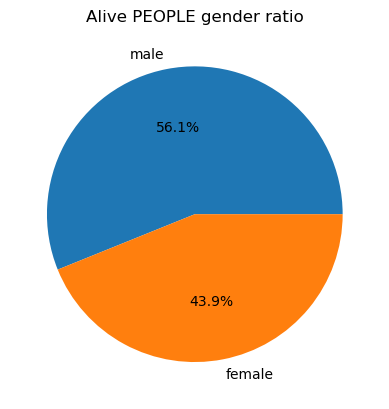

In [18]:
plt.pie(deadDF[deadDF.columns[1]].value_counts(), labels=['male','female'], autopct='%.1f%%')
plt.title("Alive PEOPLE gender ratio")
plt.show()